### Fitting Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

Text(0, 0.5, 'Signal amplitude')

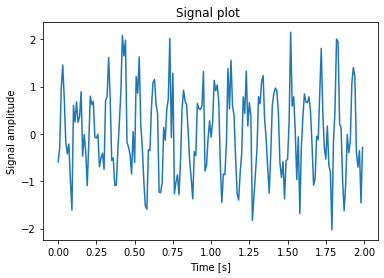

In [3]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second\n",
t = np.linspace(0, 2, 2 * f_s, endpoint=False)
signal_vals = np.sin(f * 2 * np.pi * t) + np.random.normal(0,0.5, (2 * f_s))
fig, ax = plt.subplots()
ax.plot(t, signal_vals )
plt.title("Signal plot ")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')

/home/admin/Desktop/virtual_environments/standard_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(-5, 110)

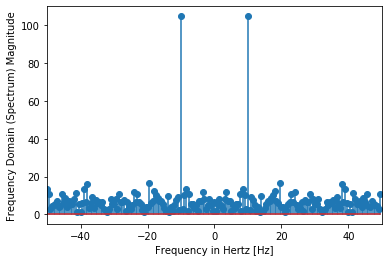

In [4]:
from scipy import fftpack

f_s = 100 # Sampling rate
# signal_values = # set signal vals
signal_vals_fft = fftpack.fft(signal_vals)
freqs = fftpack.fftfreq(len(signal_vals)) * f_s
fig, ax = plt.subplots()
ax.stem(freqs, np.abs(signal_vals_fft))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [5]:
power = np.abs(signal_vals_fft)
sorted_power = np.argsort(power)[::-1][::2]

In [6]:
power = np.abs(signal_vals_fft)
sorted_power = np.argsort(power)[::-1][::2]
first_n = 4
included_terms = sorted_power[0:first_n]
print(power[included_terms])
included_frequencies = freqs[included_terms]
print(included_frequencies)

[105.12802749  16.39817287  15.9108904   13.54377928]
[-10.  -19.5 -38.  -39. ]


In [10]:
#t =
#signal_vals =
freqs = included_frequencies
order = 2
inits = None

In [11]:
if inits == None:
    
    inits = np.random.normal(0,2, 2*order - 1)
            
if 0.0 not in freqs:

    freqs = [0.0] + list(freqs)

    var_string = ""

    for i in range(order):
        if i==0:
            var_string += "a_{} ".format(i)
        else:
            var_string += ", a_{}, b_{} ".format(i, i)
            
    for i in range(order):
        
        if i == 0:
            fourier_string = "a_{} * np.cos(2 * np.pi * {} * t)".format(i, freqs[i])
        else:
            fourier_string += " + a_{} * np.cos(2 * np.pi * {} * t) + b_{} * np.sin(2 * np.pi * {} * t)".format(i, freqs[i], i, freqs[i])
            
    exec("""def fourier_function(t, {}):
                fourier_output = {}
                return fourier_output""".format(var_string, fourier_string))
    
    params, params_covariance = optimize.curve_fit(fourier_function, t, signal_vals,
                                                   p0=inits)

In [16]:
x = np.linspace(0,100,1000)
y = np.sin(x)

n = len(y)
Y = numpy.fft.fft(y)
numpy.put(Y, range(0, i), 0.0)
numpy.put(Y, range(i+1, n), 0.0)

[ 0.00000000e+00  +0.j          0.00000000e+00  +0.j
  0.00000000e+00  +0.j          0.00000000e+00  +0.j
  0.00000000e+00  +0.j          0.00000000e+00  +0.j
  0.00000000e+00  +0.j          0.00000000e+00  +0.j
  0.00000000e+00  +0.j          0.00000000e+00  +0.j
  0.00000000e+00  +0.j          0.00000000e+00  +0.j
  0.00000000e+00  +0.j          0.00000000e+00  +0.j
  0.00000000e+00  +0.j          0.00000000e+00  +0.j
 -1.05624237e+02-485.70994863j -6.37733934e+00 -32.10871909j
 -3.09353491e+00 -17.04270514j -1.95388032e+00 -11.77841847j
 -1.37712364e+00  -9.08958039j -1.02992109e+00  -7.45262519j
 -7.98662255e-01  -6.34814998j -6.34038661e-01  -5.55062165j
 -5.11195333e-01  -4.94627499j -4.16247304e-01  -4.47149333j
 -3.40831224e-01  -4.0879084j  -2.79610506e-01  -3.77099756j
 -2.29020884e-01  -3.50434964j -1.86591960e-01  -3.27656319j
 -1.50558146e-01  -3.07946737j -1.19624556e-01  -2.90705108j
 -9.28203388e-02  -2.75479182j -6.94035982e-02  -2.6192204j
 -4.87978961e-02  -2.4976300

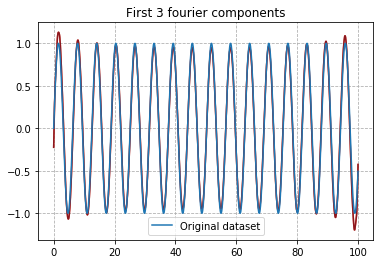

In [25]:
import numpy
from matplotlib import pyplot as plt

n = len(y)
COMPONENTS = [3]

for c in COMPONENTS:
    colors = numpy.linspace(start=100, stop=255, num=c)
    for i in range(c):
        Y = numpy.fft.fft(y)
        idx = np.quantile(Y, 0.2)
        Y[Y >= idx] = 0
        print(Y)
        #numpy.put(Y, range(i+1, n), 0.0)
        ifft = numpy.fft.ifft(Y)
        plt.plot(x, ifft, color=plt.cm.Reds(int(colors[i])), alpha=.70)

    plt.title("First {c} fourier components".format(c=c))
    plt.plot(x,y, label="Original dataset")
    plt.grid(linestyle='dashed')
    plt.legend()
    plt.show()

In [26]:
from tensorflow.keras import backend as K

def sin_activation(x):
    x = K.math.sin(x)
    return x